# Hen Fox Viper simulation

In this report, we dive into the fascinating world of agent-based simulations, using an illustrative ecosystem comprised of three species: hens, foxes, and vipers. The aim is to investigate and understand the dynamics and emergent behaviors of these entities in their shared environment. This simulated ecosystem is characterized by its own rules, which determine the behavior of the individual agents and their interactions with each other.

To accomplish this, we utilize the programming language Python, owing to its readability, ease of use, and the vast number of scientific libraries available, which makes it particularly well-suited for such simulations. The code provided above is written in Python and utilizes several libraries to perform the simulation.

Pygame, a set of Python modules designed for writing video games, forms the foundation of our simulation. It provides the essential functionalities we need, such as the creation of the simulation window, management of events (like the movements of the agents), and the update of the simulation state at each time step. Although Pygame was primarily designed for building video games, its features make it an ideal choice for developing visually-oriented simulations like ours.

The NumPy library, another invaluable tool for scientific computing with Python, is used for numerical computations which are necessary for the agents' movement and decision-making processes.

We also use the Matplotlib library, an essential tool for plotting in Python, and Matplotlib.image specifically to manage the images. This allows us to save frames of our simulation, which can later be used for analysis or to create an animation depicting the progress of the simulation.

The IPython library, particularly the display and clear_output functionalities, are employed for interactive display.

The built-in random and math libraries of Python are also utilized for generating random positions and calculating distances, respectively. The os library is used to manage the storage of the frames of our simulation.

The simulation is designed with an object-oriented approach. The base class, Agent, encapsulates the common behaviors and properties of the agents (hen, fox, viper, and food). The individual behaviors and properties of these agents are then defined in their respective classes: Hen, Fox, Viper, and Food, which inherit from the Agent class. This approach provides a clear structure to our code and makes it easier to modify or extend.

In our simulation, we will be testing three different strategies: naive, group strategies and bait standalone strategy. The behavior of the agents is adjusted according to these strategies, but the initial configuration - including the speed, vision range, and hunger rates of the agents - remains constant. Through these simulations, we aim to understand how these different strategies affect the survival and interactions of the different agents in our ecosystem.

We have tries to make these agents have different configurations that make them have an advantages over others in specific domaines. for example 

Foxes will be the worst about their hunger followed by the hens and then the vipers that have the lowest energy loss rate. 

For the speed, the hens would be the slowest, followed by the viper and the foxes will be able to run faster than the others.

Concerning the vision range, viper would have a narrow vision of the environnement while the foxes would have better sight and the hens would be able to see enemies from far.


The rest of this report will delve into the specifics of these strategies and the findings from the simulation runs. So, let's dive into the details of the fascinating dynamics of our virtual ecosystem.

In [1]:
!pip install imageio imageio[ffmpeg]
import pygame
from google.colab.patches import cv2_imshow
from google.colab import output
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output
import math
import random
import pygame
from pygame.locals import (K_ESCAPE, KEYDOWN)

os.environ["SDL_VIDEODRIVER"] = "dummy"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
pygame 2.3.0 (SDL 2.24.2, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Part 1 : Defining the classes, attributes and metrics computations

This code snippet represents a multi-agent predator-prey simulation where the agents represent food, hens, foxes, and vipers. The environment is a closed 2D space of a given width and height.

Each agent is modeled using classes in Python, which encapsulate its behavior and attributes. The Agent class is the parent class which contains common properties and methods for all types of agents, including position, velocity, energy, vision, target, etc. The Hen, Fox, Viper, and Food classes inherit from the Agent class and represent the specific agents in the simulation.

Each agent has the following specific behaviors:

Hen: These agents have the smallest vision and a moderate velocity. They look for food and avoid foxes. They lose energy over time and will die if they run out of energy.

Fox: These agents have a slightly lower vision and the highest velocity. They hunt for hens and avoid vipers. They also lose energy over time and will die if they run out of energy.

Viper: These agents have the lowest vision and an intermediate velocity. They hunt for foxes and avoid hens. They lose energy at the slowest rate among the three predators.

Food: These agents do not move or lose energy. They exist as targets for the different agents.

The simulation loop involves each agent moving in its environment according to its velocity, vision, and available targets. Hens, foxes, and vipers can eat food, hens, foxes and vipers respectively (depending on their preys) if they are close enough, and they can die if they run out of energy.

This is an interesting simulation as it models a simplified version of an ecosystem with different species interacting with each other and with their environment. It shows how different behaviors can result in different outcomes in terms of survival and predation.

However, the representation is quite naive and has several limitations:

The agents have no learning capability. They follow hardcoded rules and cannot adapt to changing conditions.

There is no reproduction. Dead agents are removed from the simulation but new agents are not created.

The ecosystem is oversimplified. It lacks many factors that could influence the survival of the agents, like diseases, shelter, weather, mating behaviors, etc.

All individuals of the same species behave identically, whereas in reality there is often variation in behaviors within a species.

There's no spatial heterogeneity or obstacles in the environment. All areas of the screen are equally suitable for all agents.

Agents don't have a memory of past events or an ability to communicate or cooperate with others.

Despite these limitations, this simple simulation can still provide some insight into the dynamics of predator-prey interactions in a closed ecosystem. For a more realistic and complex simulation, the model could be extended to include more behaviors, environmental factors, and types of agents.


Hens kills: 327
Foxes kills: 493
Vipers kills: 646


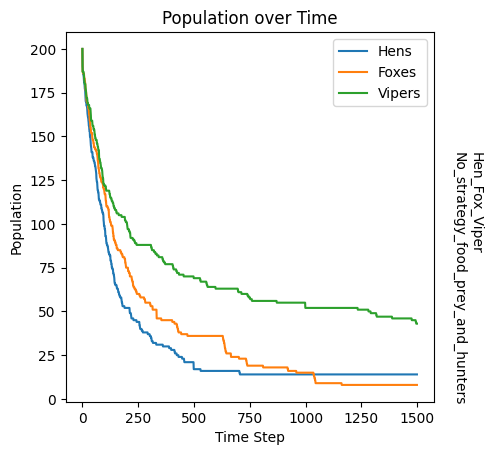

Hens disappeared at: None
Foxes disappeared at: None
Vipers disappeared at: None
Hens dominated from: None to None
Foxes dominated from: None to None
Vipers dominated from: 472 to 1467


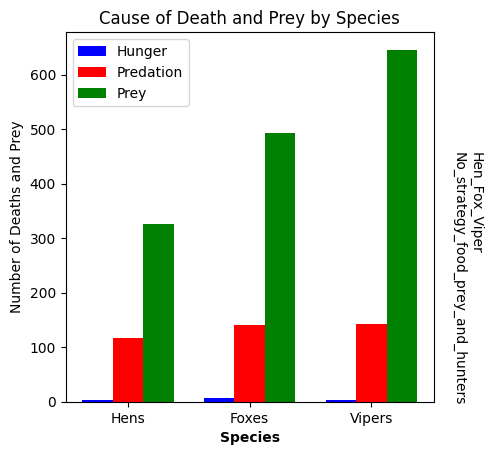

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output

import math
import random

import pygame
from pygame.locals import (K_ESCAPE, KEYDOWN)
import numpy as np

SIMULATION_NAME = 'Hen_Fox_Viper'
SIMULATION_EXPERIMENT = 'No_strategy_food_prey_and_hunters'


# Define constants for the screen width and height
SCREEN_WIDTH = 500
SCREEN_HEIGHT = 500

class Agent(pygame.sprite.Sprite):
    def __init__(self, size, color, x=None, y=None):
        super().__init__()
        
        self.food_eaten = 0
        self.died_of_starvation = False
        self.vision = 100  # The vision radius of the agent.
        self.cause_of_death = None  # None, 'starvation' or 'hunting'


        # draw agent
        self.surf = pygame.Surface((2*size, 2*size), pygame.SRCALPHA, 32)
        pygame.draw.circle(self.surf, color, (size, size), size)
        self.rect = self.surf.get_rect()

        # default values
        self.vmax = 0.1

        # initial position
        self.x = x if x else random.randint(0, SCREEN_WIDTH)
        self.y = y if y else random.randint(0, SCREEN_HEIGHT)

        # initial velocity
        self.dx = 0
        self.dy = 0

        # inital values
        self.is_alive = True
        self.target = None
        self.age = 0
        self.energy = 1

        # move agent on screen
        self.rect.centerx = int(self.x)
        self.rect.centery = int(self.y)
        
        # Add these lines
        self.food_eaten = 0  # Initialize food eaten as 0
        self.died_of_starvation = False  # Initialize died_of_starvation as False





    def update(self, screen, food=(), prey=(), allies=()):
        self.age = self.age + 1

        # we can't move, just update the screen
        if self.vmax == 0:
            screen.blit(self.surf, self.rect)
            return

        # target is dead, don't chase it further
        if self.target and not self.target.is_alive:
            self.target = None

        # eat the target if close enough
        if self.target:
            squared_dist = (self.x - self.target.x) ** 2 + (self.y - self.target.y) ** 2
            if squared_dist < 25:
                self.target.is_alive = False
                self.target.cause_of_death = 'hunting'  # Set cause of death to hunting
                self.energy = self.energy + 1        
                self.food_eaten += 1
    
        # agent doesn't have a target or haven't reevaluate since 11 updates, find a new one
        if not self.target or self.age % 11 == 0:
            min_dist = 9999999
            min_agent = None
            # for food, prey, and allies, only consider those agents which are of different classes
            for a in (food + prey + allies):
                if a is not self and a.is_alive and type(self) != type(a):
                    sq_dist = (self.x - a.x) ** 2 + (self.y - a.y) ** 2
                    if sq_dist < min_dist and sq_dist < self.vision ** 2:  # Consider only those within vision.
                        min_dist = sq_dist
                        min_agent = a
            if min_dist < self.vision ** 2:  # Set target only if it's within vision.
                self.target = min_agent

        # initalize 'forces' to zero
        fx = 0
        fy = 0

        # move in the direction of the target, if any
        if self.target:
            fx += 0.1*(self.target.x - self.x)
            fy += 0.1*(self.target.y - self.y)

        # update our direction based on the 'force'
        self.dx = self.dx + 0.05*fx
        self.dy = self.dy + 0.05*fy

        # slow down agent if it moves faster than it max velocity
        velocity = math.sqrt(self.dx ** 2 + self.dy ** 2)
        if velocity > self.vmax:
            self.dx = (self.dx / velocity) * (self.vmax)
            self.dy = (self.dy / velocity) * (self.vmax)

        # update position based on delta x/y
        self.x = self.x + self.dx
        self.y = self.y + self.dy

        # ensure it stays within the screen window
        self.x = max(self.x, 0)
        self.x = min(self.x, SCREEN_WIDTH)
        self.y = max(self.y, 0)
        self.y = min(self.y, SCREEN_HEIGHT)

        # update graphics
        self.rect.centerx = int(self.x)
        self.rect.centery = int(self.y)
        if self.is_alive:
            screen.blit(self.surf, self.rect)

        
        # Lose energy over time
        self.energy -= self.energy_decrease_rate
        # Die if energy reaches 0
        if self.energy <= 0:
            self.is_alive = False
            self.died_of_starvation = True
            self.cause_of_death = 'starvation'  # Set cause of death to starvation


class Hen(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (255, 255, 255)  # Use white color for hens
        super().__init__(size, color)
        self.vmax = 0.2  # Max velocity for hens
        self.vision = 70  # Set vision for hens.
        self.energy_decrease_rate = 0.002  # Set energy decrease rate for hens

class Fox(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (255, 0, 0)  # Use red color for foxes
        super().__init__(size, color)
        self.vmax = 0.3  # Max velocity for foxes
        self.vision = 50  # Set vision for foxes.
        self.energy_decrease_rate = 0.003  # Set energy decrease rate for foxes

class Viper(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (0, 0, 255)  # Use blue color for vipers
        super().__init__(size, color)
        self.vmax = 0.25  # Max velocity for vipers
        self.vision = 30  # Set vision for vipers.
        self.energy_decrease_rate = 0.001  # Set energy decrease rate for vipers

class Food(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (0, 128, 0)  # Use green color for food
        super().__init__(size, color)
        self.vmax = 0  # Food doesn't move

def main():
    # Import and initialize the pygame library
    pygame.init()
    clock = pygame.time.Clock()

    # Create the screen object
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    # Set the caption of the window to the simulation name
    pygame.display.set_caption(SIMULATION_NAME)
    
    # create a font object once and render() to create a surface
    font = pygame.font.Font(None, 24)  # Use the default font and set the size to 24
    large_font = pygame.font.Font(None, 32)  # Use the default font and set a larger size for the title and subtitle

    # Create the surfaces for the simulation name and experiment
    sim_name_surf = large_font.render(SIMULATION_NAME, True, (255, 255, 255))
    sim_experiment_surf = large_font.render(SIMULATION_EXPERIMENT, True, (255, 255, 255))

    # Create initial agents before the simulation starts
    hens = [Hen() for i in range(200)]
    foxes = [Fox() for i in range(200)]
    vipers = [Viper() for i in range(200)]
    food_items = [Food() for i in range(200)]
    
    # Tracking variables
    hen_population = []
    fox_population = []
    viper_population = []

    dead_hens = []
    dead_foxes = []
    dead_vipers = []

    
    disappearance_times = {'hen': None, 'fox': None, 'viper': None}
    domination_times = {'hen': None, 'fox': None, 'viper': None}
    domination_durations = {'hen': 0, 'fox': 0, 'viper': 0}
    
    # Track deaths separately for each species
    hen_deaths_by_hunger = 0
    fox_deaths_by_hunger = 0
    viper_deaths_by_hunger = 0
    hen_deaths_by_predation = 0
    fox_deaths_by_predation = 0
    viper_deaths_by_predation = 0
    


    frame = 0
    os.makedirs(SIMULATION_EXPERIMENT, exist_ok=True)
    
    living_hens = sum([1 for h in hens if h.is_alive])
    living_foxes = sum([1 for f in foxes if f.is_alive])
    living_vipers = sum([1 for v in vipers if v.is_alive])
    poptot = living_hens + living_foxes + living_vipers

    def generate_food(step):
        if step < 1500:
            amount_of_food = max(100 - step // 15, 10)  # Reduce food amount gradually to 10 by the 1500th step
            for _ in range(amount_of_food):
                food_items.append(Food())
    # Run until the user asks to quit or until 1500 frames are generated
    running = True
    while running and frame < 1500 and (living_hens > 0 or living_foxes > 0 or living_vipers > 0):

        if frame % 100 == 0:
            generate_food(frame)

        # Fill the background
        screen.fill((11, 11, 11))
        # Draw the legend
        legend_hen = font.render('Hens', True, (255, 255, 255))
        legend_fox = font.render('Foxes', True, (255, 0, 0))
        legend_viper = font.render('Vipers', True, (0, 0, 255))
        legend_food = font.render('Food', True, (0, 128, 0))
        pygame.draw.circle(screen, (255, 255, 255), (20, 20), 10)
        screen.blit(legend_hen, (40, 10))
        pygame.draw.circle(screen, (255, 0, 0), (20, 50), 10)
        screen.blit(legend_fox, (40, 40))
        pygame.draw.circle(screen, (0, 0, 255), (20, 80), 10)
        screen.blit(legend_viper, (40, 70))
        pygame.draw.circle(screen, (0, 128, 0), (20, 110), 10)
        screen.blit(legend_food, (40, 100))


        # Update agents
        [f.update(screen) for f in food_items]
        # Update agents
        [h.update(screen, food=food_items, prey=vipers, allies=hens) for h in hens]
        [f.update(screen, food=food_items, prey=hens, allies=foxes) for f in foxes]
        [v.update(screen, food=food_items, prey=foxes, allies=vipers) for v in vipers]

        dead_hens.extend([h for h in hens if not h.is_alive])
        dead_foxes.extend([f for f in foxes if not f.is_alive])
        dead_vipers.extend([v for v in vipers if not v.is_alive])
        
        hens = [h for h in hens if h.is_alive]
        foxes = [f for f in foxes if f.is_alive]
        vipers = [v for v in vipers if v.is_alive]



        # Filter out food items that are not alive (have been eaten)
        food_items = [f for f in food_items if f.is_alive]

        # Update disappearance times
        if living_hens == 0 and disappearance_times['hen'] is None:
            disappearance_times['hen'] = frame
        if living_foxes == 0 and disappearance_times['fox'] is None:
            disappearance_times['fox'] = frame
        if living_vipers == 0 and disappearance_times['viper'] is None:
            disappearance_times['viper'] = frame

        # Update domination times and durations
        if max(living_hens/poptot, living_foxes/poptot, living_vipers/poptot) > 0.55:
            if living_hens/poptot > 0.55 and domination_times['hen'] is None:
                domination_times['hen'] = frame
            if living_foxes/poptot > 0.55 and domination_times['fox'] is None:
                domination_times['fox'] = frame
            if living_vipers/poptot > 0.55 and domination_times['viper'] is None:
                domination_times['viper'] = frame
            for species, time in domination_times.items():
                if time is not None:
                    domination_durations[species] += 1

        # Count the current number of each type of agent
        living_hens = sum([1 for h in hens if h.is_alive])
        living_foxes = sum([1 for f in foxes if f.is_alive])
        living_vipers = sum([1 for v in vipers if v.is_alive])
        poptot = living_hens + living_foxes + living_vipers

        hen_population.append(living_hens)
        fox_population.append(living_foxes)
        viper_population.append(living_vipers)

        
        # draw all changes to the screen
        pygame.display.flip()
        clock.tick(10)
        
        frame += 1
        pygame.image.save(screen, f"{SIMULATION_EXPERIMENT}/frame_{frame:03d}.png")


    if living_hens == 0 and living_foxes == 0 and living_vipers == 0:
        print("All agents are dead. Ending simulation.")
    pygame.quit()
    
    # Count the deaths by hunger and predation separately for each species
    hen_deaths_by_hunger += sum([1 for h in hens if h.died_of_starvation]) + sum([1 for h in dead_hens if h.died_of_starvation])
    fox_deaths_by_hunger += sum([1 for f in foxes if f.died_of_starvation]) + sum([1 for f in dead_foxes if f.died_of_starvation])
    viper_deaths_by_hunger += sum([1 for v in vipers if v.died_of_starvation]) + sum([1 for v in dead_vipers if v.died_of_starvation])
    
    hen_deaths_by_predation += sum([1 for h in hens if h.food_eaten]) + sum([1 for h in dead_hens if h.food_eaten])
    fox_deaths_by_predation += sum([1 for f in foxes if f.food_eaten]) + sum([1 for f in dead_foxes if f.food_eaten])
    viper_deaths_by_predation += sum([1 for v in vipers if v.food_eaten]) + sum([1 for v in dead_vipers if v.food_eaten])
    
    hen_kills = sum([h.food_eaten for h in hens]) + sum([h.food_eaten for h in dead_hens])
    fox_kills = sum([f.food_eaten for f in foxes]) + sum([f.food_eaten for f in dead_foxes])
    viper_kills = sum([v.food_eaten for v in vipers]) + sum([v.food_eaten for v in dead_vipers])

    print(f'Hens kills: {hen_kills}')
    print(f'Foxes kills: {fox_kills}')
    print(f'Vipers kills: {viper_kills}')
    



        # Plot the population over time
    fig = plt.figure()
    plt.subplots_adjust(right=0.7)  # Adjust the right boundary of the plot to make room for the text
    plt.plot(hen_population, label='Hens')
    plt.plot(fox_population, label='Foxes')
    plt.plot(viper_population, label='Vipers')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Population over Time')
    # Adding simulation name and experiment as text beside the plot
    plt.annotate(SIMULATION_NAME + "\n" + SIMULATION_EXPERIMENT, 
                 xy=(1.05, 0), xycoords='axes fraction',rotation=-90)
    plt.show()
    
    fig.savefig(f"{SIMULATION_EXPERIMENT}/population_over_time.png",dpi=300)



    print(f'Hens disappeared at: {disappearance_times["hen"]}')
    print(f'Foxes disappeared at: {disappearance_times["fox"]}')
    print(f'Vipers disappeared at: {disappearance_times["viper"]}')
    print(f'Hens dominated from: {domination_times["hen"]} to {domination_times["hen"] + domination_durations["hen"] if domination_times["hen"] is not None else None}')
    print(f'Foxes dominated from: {domination_times["fox"]} to {domination_times["fox"] + domination_durations["fox"] if domination_times["fox"] is not None else None}')
    print(f'Vipers dominated from: {domination_times["viper"]} to {domination_times["viper"] + domination_durations["viper"] if domination_times["viper"] is not None else None}')
    
    with open(f"{SIMULATION_EXPERIMENT}/metrics.txt", "w") as file:
        file.write(f'Hens disappeared at: {disappearance_times["hen"]}\n')
        file.write(f'Foxes disappeared at: {disappearance_times["fox"]}\n')
        file.write(f'Vipers disappeared at: {disappearance_times["viper"]}\n')
        file.write(f'Hens dominated from: {domination_times["hen"]} to {domination_times["hen"] + domination_durations["hen"] if domination_times["hen"] is not None else None}\n')
        file.write(f'Foxes dominated from: {domination_times["fox"]} to {domination_times["fox"] + domination_durations["fox"] if domination_times["fox"] is not None else None}\n')
        file.write(f'Vipers dominated from: {domination_times["viper"]} to {domination_times["viper"] + domination_durations["viper"] if domination_times["viper"] is not None else None}\n')
    
    # Set width of bar
    barWidth = 0.25

    # Set the positions of the bars on the x-axis
    r = np.arange(3)  # For 3 species

        # Create bars
    fig = plt.figure()
    plt.subplots_adjust(right=0.7)  # Adjust the right boundary of the plot to make room for the text
    plt.bar(r - barWidth, [hen_deaths_by_hunger, fox_deaths_by_hunger, viper_deaths_by_hunger], color='b', width=barWidth, label='Hunger')
    plt.bar(r, [hen_deaths_by_predation, fox_deaths_by_predation, viper_deaths_by_predation], color='r', width=barWidth, label='Predation')
    plt.bar(r + barWidth, [hen_kills, fox_kills, viper_kills], color='g', width=barWidth, label='Prey')

    # Adding xticks
    plt.xlabel('Species', fontweight='bold')
    plt.xticks(r, ['Hens', 'Foxes', 'Vipers'])

    plt.ylabel('Number of Deaths and Prey')
    plt.title('Cause of Death and Prey by Species')
    plt.legend()
    # Adding simulation name and experiment as text beside the plot
    plt.annotate(SIMULATION_NAME + "\n" + SIMULATION_EXPERIMENT, 
                 xy=(1.05, 0), xycoords='axes fraction',rotation=-90)

    # Show the plot
    plt.show()
    
    fig.savefig(f"{SIMULATION_EXPERIMENT}/cause_of_death_and_prey.png",dpi=300)

   

if __name__ == "__main__":
    main()

In order to visualize the different simulations we created this code snippet, you can visualize that in the folders created inside the colab or within the zip file that we provided.

In [7]:
import imageio.v2 as iio
from IPython.display import Video, display
import os
import imageio as iio

SIMULATION_EXPERIMENT = f"/content/{SIMULATION_EXPERIMENT}"
images = []

# Get a list of all image files in the directory with the structure "frame_942.png"
image_files = [filename for filename in os.listdir(SIMULATION_EXPERIMENT) if filename.startswith("frame_") and filename.endswith(".png")]

# Sort the image files based on their numeric part (e.g., frame_942.png, frame_943.png, etc.)
sorted_files = sorted(image_files, key=lambda x: int(x.split("_")[1].split(".")[0]))

# Iterate through the sorted image files
for filename in sorted_files:
    image_path = os.path.join(SIMULATION_EXPERIMENT, filename)
    images.append(iio.imread(image_path))

iio.mimsave('simulation.mp4', images, fps=30)  # Change the number of fps (frames per second) as needed




import imageio.v2 as iio
from IPython.display import HTML
from base64 import b64encode
# Display the video
mp4 = open('simulation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

<ipython-input-7-58adf2b2ed51>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(iio.imread(image_path))


## Part 2 : First strategy, Group hunting strategy

The key strategy implemented here is what might be called "group protective predation". This means that agents take into account the presence of other similar agents (allies) and potential threats (predators) within their vision range when choosing their target. If an agent perceives more predators than allies within its range, it tends to choose an ally as a target, seemingly triggering the closest ally to join it and help fend off the predators. However, if the agent perceives more allies than predators, it feels safe enough to target food or prey.

In each step of the simulation, agents update their states by selecting new targets if necessary and moving towards them. If an agent gets close enough to its target, it can eat it, which results in gaining energy. However, all agents lose energy over time, and if an agent's energy level drops to zero, the agent dies of starvation.

This simulation can be interesting as it provides a simplified model of predator-prey dynamics and social behavior in nature. It illustrates how the behavior of each agent affects the overall population dynamics and how agents can change their behavior depending on the perceived threat level.

However, there are some limitations to this naive representation:

Over-Simplification: The model is a highly simplified version of reality. It does not take into account various factors such as reproduction, diseases, aging, varying agent intelligence, or complex social behaviors, which can significantly influence the dynamics of such systems in the real world.

Vision-Based Strategy: The strategy of choosing targets is solely based on the vision of agents. Real-life animals use a variety of sensory information, not just vision, to make decisions about their behavior.

Binary Actions: The model only allows two actions for the agents - move towards the target or die if energy drops to zero. Real-life agents may have a much broader range of possible actions.

Static Parameters: The properties of the agents (like vision, speed, energy decrease rate) are static and don't change over time. In a more realistic model, these parameters might evolve due to natural selection or other factors.

In summary, while this simulation provides a basic understanding of certain predator-prey dynamics, it oversimplifies the complexity of such systems in nature. Nevertheless, it can serve as a starting point for more complex and realistic models.

Hens kills: 390
Foxes kills: 435
Vipers kills: 591


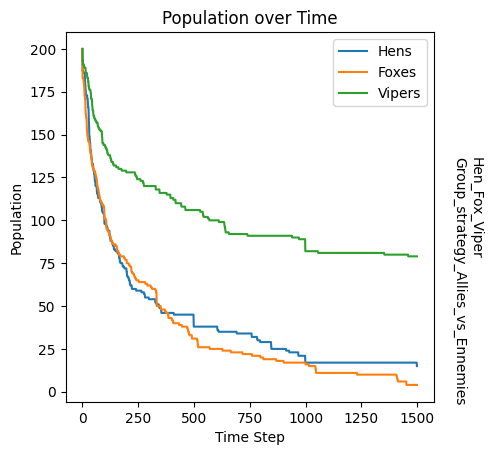

Hens disappeared at: None
Foxes disappeared at: None
Vipers disappeared at: None
Hens dominated from: None to None
Foxes dominated from: None to None
Vipers dominated from: 355 to 1500


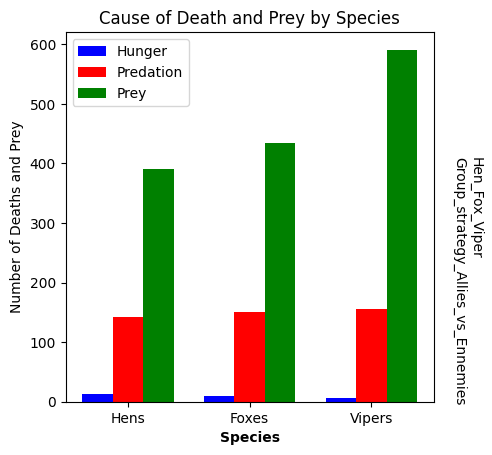

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output

import math
import random

import pygame
from pygame.locals import (K_ESCAPE, KEYDOWN)
import numpy as np

SIMULATION_NAME = 'Hen_Fox_Viper'
SIMULATION_EXPERIMENT = 'Group_strategy_Allies_vs_Ennemies'

# Define constants for the screen width and height
SCREEN_WIDTH = 500
SCREEN_HEIGHT = 500

class Agent(pygame.sprite.Sprite):
    def __init__(self, size, color, x=None, y=None):
        super().__init__()
        
        self.food_eaten = 0
        self.died_of_starvation = False
        self.vision = 100  # The vision radius of the agent.
        self.cause_of_death = None  # None, 'starvation' or 'hunting'


        # draw agent
        self.surf = pygame.Surface((2*size, 2*size), pygame.SRCALPHA, 32)
        pygame.draw.circle(self.surf, color, (size, size), size)
        self.rect = self.surf.get_rect()

        # default values
        self.vmax = 0.1

        # initial position
        self.x = x if x else random.randint(0, SCREEN_WIDTH)
        self.y = y if y else random.randint(0, SCREEN_HEIGHT)

        # initial velocity
        self.dx = 0
        self.dy = 0

        # inital values
        self.is_alive = True
        self.target = None
        self.age = 0
        self.energy = 1

        # move agent on screen
        self.rect.centerx = int(self.x)
        self.rect.centery = int(self.y)
        
        # Add these lines
        self.food_eaten = 0  # Initialize food eaten as 0
        self.died_of_starvation = False  # Initialize died_of_starvation as False





    def update(self, screen, food=(), prey=(), allies=()):
        self.age = self.age + 1

        # we can't move, just update the screen
        if self.vmax == 0:
            screen.blit(self.surf, self.rect)
            return

        # target is dead, don't chase it further
        if self.target and not self.target.is_alive:
            self.target = None

        # eat the target if close enough
        if self.target:
            squared_dist = (self.x - self.target.x) ** 2 + (self.y - self.target.y) ** 2
            if squared_dist < 25:
                self.target.is_alive = False
                self.target.cause_of_death = 'hunting'  # Set cause of death to hunting
                self.energy = self.energy + 1        
                self.food_eaten += 1
    
        # agent doesn't have a target or haven't reevaluate since 11 updates, find a new one
        if not self.target or self.age % 11 == 0:
            min_dist = 9999999
            min_agent = None
            # for food, prey, and allies, only consider those agents which are of different classes
            for a in (food + prey + allies):
                if a is not self and a.is_alive and type(self) != type(a):
                    sq_dist = (self.x - a.x) ** 2 + (self.y - a.y) ** 2
                    if sq_dist < min_dist and sq_dist < self.vision ** 2:  # Consider only those within vision.
                        min_dist = sq_dist
                        min_agent = a
            if min_dist < self.vision ** 2:  # Set target only if it's within vision.
                # Count number of similar agents (allies) and predators in the vision range
                allies_in_range = sum(1 for a in allies if a.is_alive and (self.x - a.x) ** 2 + (self.y - a.y) ** 2 < self.vision ** 2)
                predators_in_range = sum(1 for a in prey if a.is_alive and (self.x - a.x) ** 2 + (self.y - a.y) ** 2 < self.vision ** 2)
                # If there are less allies than predators, trigger the closest ally to join
                if allies_in_range < predators_in_range:
                    # Find the closest ally
                    closest_ally_dist = 9999999
                    closest_ally = None
                    for a in allies:
                        if a is not self and a.is_alive:
                            sq_dist = (self.x - a.x) ** 2 + (self.y - a.y) ** 2
                            if sq_dist < closest_ally_dist and sq_dist < self.vision ** 2:
                                closest_ally_dist = sq_dist
                                closest_ally = a
                    if closest_ally_dist < self.vision ** 2:
                        self.target = closest_ally
                else:
                    self.target = min_agent

        # initalize 'forces' to zero
        fx = 0
        fy = 0

        # move in the direction of the target, if any
        if self.target:
            fx += 0.1*(self.target.x - self.x)
            fy += 0.1*(self.target.y - self.y)

        # update our direction based on the 'force'
        self.dx = self.dx + 0.05*fx
        self.dy = self.dy + 0.05*fy

        # slow down agent if it moves faster than it max velocity
        velocity = math.sqrt(self.dx ** 2 + self.dy ** 2)
        if velocity > self.vmax:
            self.dx = (self.dx / velocity) * (self.vmax)
            self.dy = (self.dy / velocity) * (self.vmax)

        # update position based on delta x/y
        self.x = self.x + self.dx
        self.y = self.y + self.dy

        # ensure it stays within the screen window
        self.x = max(self.x, 0)
        self.x = min(self.x, SCREEN_WIDTH)
        self.y = max(self.y, 0)
        self.y = min(self.y, SCREEN_HEIGHT)

        # update graphics
        self.rect.centerx = int(self.x)
        self.rect.centery = int(self.y)
        if self.is_alive:
            screen.blit(self.surf, self.rect)

        
        # Lose energy over time
        self.energy -= self.energy_decrease_rate
        # Die if energy reaches 0
        if self.energy <= 0:
            self.is_alive = False
            self.died_of_starvation = True
            self.cause_of_death = 'starvation'  # Set cause of death to starvation


class Hen(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (255, 255, 255)  # Use white color for hens
        super().__init__(size, color)
        self.vmax = 0.2  # Max velocity for hens
        self.vision = 70  # Set vision for hens.
        self.energy_decrease_rate = 0.002  # Set energy decrease rate for hens

class Fox(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (255, 0, 0)  # Use red color for foxes
        super().__init__(size, color)
        self.vmax = 0.3  # Max velocity for foxes
        self.vision = 50  # Set vision for foxes.
        self.energy_decrease_rate = 0.003  # Set energy decrease rate for foxes

class Viper(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (0, 0, 255)  # Use blue color for vipers
        super().__init__(size, color)
        self.vmax = 0.25  # Max velocity for vipers
        self.vision = 30  # Set vision for vipers.
        self.energy_decrease_rate = 0.001  # Set energy decrease rate for vipers

class Food(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (0, 128, 0)  # Use green color for food
        super().__init__(size, color)
        self.vmax = 0  # Food doesn't move

def main():
    # Import and initialize the pygame library
    pygame.init()
    clock = pygame.time.Clock()

    # Create the screen object
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    # Set the caption of the window to the simulation name
    pygame.display.set_caption(SIMULATION_NAME)
    
    # create a font object once and render() to create a surface
    font = pygame.font.Font(None, 24)  # Use the default font and set the size to 24
    large_font = pygame.font.Font(None, 32)  # Use the default font and set a larger size for the title and subtitle

    # Create the surfaces for the simulation name and experiment
    sim_name_surf = large_font.render(SIMULATION_NAME, True, (255, 255, 255))
    sim_experiment_surf = large_font.render(SIMULATION_EXPERIMENT, True, (255, 255, 255))

    # Create initial agents before the simulation starts
    hens = [Hen() for i in range(200)]
    foxes = [Fox() for i in range(200)]
    vipers = [Viper() for i in range(200)]
    food_items = [Food() for i in range(200)]
    
    # Tracking variables
    hen_population = []
    fox_population = []
    viper_population = []

    dead_hens = []
    dead_foxes = []
    dead_vipers = []

    
    disappearance_times = {'hen': None, 'fox': None, 'viper': None}
    domination_times = {'hen': None, 'fox': None, 'viper': None}
    domination_durations = {'hen': 0, 'fox': 0, 'viper': 0}
    
    # Track deaths separately for each species
    hen_deaths_by_hunger = 0
    fox_deaths_by_hunger = 0
    viper_deaths_by_hunger = 0
    hen_deaths_by_predation = 0
    fox_deaths_by_predation = 0
    viper_deaths_by_predation = 0
    


    frame = 0
    os.makedirs(SIMULATION_EXPERIMENT, exist_ok=True)
    
    living_hens = sum([1 for h in hens if h.is_alive])
    living_foxes = sum([1 for f in foxes if f.is_alive])
    living_vipers = sum([1 for v in vipers if v.is_alive])
    poptot = living_hens + living_foxes + living_vipers

    def generate_food(step):
        if step < 1500:
            amount_of_food = max(100 - step // 15, 10)  # Reduce food amount gradually to 10 by the 1500th step
            for _ in range(amount_of_food):
                food_items.append(Food())
    # Run until the user asks to quit or until 1500 frames are generated
    running = True
    while running and frame < 1500 and (living_hens > 0 or living_foxes > 0 or living_vipers > 0):

        if frame % 100 == 0:
            generate_food(frame)

        # Fill the background
        screen.fill((11, 11, 11))
        # Draw the legend
        legend_hen = font.render('Hens', True, (255, 255, 255))
        legend_fox = font.render('Foxes', True, (255, 0, 0))
        legend_viper = font.render('Vipers', True, (0, 0, 255))
        legend_food = font.render('Food', True, (0, 128, 0))
        pygame.draw.circle(screen, (255, 255, 255), (20, 20), 10)
        screen.blit(legend_hen, (40, 10))
        pygame.draw.circle(screen, (255, 0, 0), (20, 50), 10)
        screen.blit(legend_fox, (40, 40))
        pygame.draw.circle(screen, (0, 0, 255), (20, 80), 10)
        screen.blit(legend_viper, (40, 70))
        pygame.draw.circle(screen, (0, 128, 0), (20, 110), 10)
        screen.blit(legend_food, (40, 100))


        # Update agents
        [f.update(screen) for f in food_items]
        # Update agents
        [h.update(screen, food=food_items, prey=vipers, allies=hens) for h in hens]
        [f.update(screen, food=food_items, prey=hens, allies=foxes) for f in foxes]
        [v.update(screen, food=food_items, prey=foxes, allies=vipers) for v in vipers]

        dead_hens.extend([h for h in hens if not h.is_alive])
        dead_foxes.extend([f for f in foxes if not f.is_alive])
        dead_vipers.extend([v for v in vipers if not v.is_alive])
        
        hens = [h for h in hens if h.is_alive]
        foxes = [f for f in foxes if f.is_alive]
        vipers = [v for v in vipers if v.is_alive]



        # Filter out food items that are not alive (have been eaten)
        food_items = [f for f in food_items if f.is_alive]

        # Update disappearance times
        if living_hens == 0 and disappearance_times['hen'] is None:
            disappearance_times['hen'] = frame
        if living_foxes == 0 and disappearance_times['fox'] is None:
            disappearance_times['fox'] = frame
        if living_vipers == 0 and disappearance_times['viper'] is None:
            disappearance_times['viper'] = frame

        # Update domination times and durations
        if max(living_hens/poptot, living_foxes/poptot, living_vipers/poptot) > 0.55:
            if living_hens/poptot > 0.55 and domination_times['hen'] is None:
                domination_times['hen'] = frame
            if living_foxes/poptot > 0.55 and domination_times['fox'] is None:
                domination_times['fox'] = frame
            if living_vipers/poptot > 0.55 and domination_times['viper'] is None:
                domination_times['viper'] = frame
            for species, time in domination_times.items():
                if time is not None:
                    domination_durations[species] += 1

        # Count the current number of each type of agent
        living_hens = sum([1 for h in hens if h.is_alive])
        living_foxes = sum([1 for f in foxes if f.is_alive])
        living_vipers = sum([1 for v in vipers if v.is_alive])
        poptot = living_hens + living_foxes + living_vipers

        hen_population.append(living_hens)
        fox_population.append(living_foxes)
        viper_population.append(living_vipers)

        
        # draw all changes to the screen
        pygame.display.flip()
        clock.tick(10)
        
        frame += 1
        pygame.image.save(screen, f"{SIMULATION_EXPERIMENT}/frame_{frame:03d}.png")


    if living_hens == 0 and living_foxes == 0 and living_vipers == 0:
        print("All agents are dead. Ending simulation.")
    pygame.quit()
    
    # Count the deaths by hunger and predation separately for each species
    hen_deaths_by_hunger += sum([1 for h in hens if h.died_of_starvation]) + sum([1 for h in dead_hens if h.died_of_starvation])
    fox_deaths_by_hunger += sum([1 for f in foxes if f.died_of_starvation]) + sum([1 for f in dead_foxes if f.died_of_starvation])
    viper_deaths_by_hunger += sum([1 for v in vipers if v.died_of_starvation]) + sum([1 for v in dead_vipers if v.died_of_starvation])
    
    hen_deaths_by_predation += sum([1 for h in hens if h.food_eaten]) + sum([1 for h in dead_hens if h.food_eaten])
    fox_deaths_by_predation += sum([1 for f in foxes if f.food_eaten]) + sum([1 for f in dead_foxes if f.food_eaten])
    viper_deaths_by_predation += sum([1 for v in vipers if v.food_eaten]) + sum([1 for v in dead_vipers if v.food_eaten])
    
    hen_kills = sum([h.food_eaten for h in hens]) + sum([h.food_eaten for h in dead_hens])
    fox_kills = sum([f.food_eaten for f in foxes]) + sum([f.food_eaten for f in dead_foxes])
    viper_kills = sum([v.food_eaten for v in vipers]) + sum([v.food_eaten for v in dead_vipers])

    print(f'Hens kills: {hen_kills}')
    print(f'Foxes kills: {fox_kills}')
    print(f'Vipers kills: {viper_kills}')
    



        # Plot the population over time
    fig = plt.figure()
    plt.subplots_adjust(right=0.7)  # Adjust the right boundary of the plot to make room for the text
    plt.plot(hen_population, label='Hens')
    plt.plot(fox_population, label='Foxes')
    plt.plot(viper_population, label='Vipers')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Population over Time')
    # Adding simulation name and experiment as text beside the plot
    plt.annotate(SIMULATION_NAME + "\n" + SIMULATION_EXPERIMENT, 
                 xy=(1.05, 0), xycoords='axes fraction',rotation=-90)
    plt.show()
    
    fig.savefig(f"{SIMULATION_EXPERIMENT}/population_over_time.png",dpi=300)



    print(f'Hens disappeared at: {disappearance_times["hen"]}')
    print(f'Foxes disappeared at: {disappearance_times["fox"]}')
    print(f'Vipers disappeared at: {disappearance_times["viper"]}')
    print(f'Hens dominated from: {domination_times["hen"]} to {domination_times["hen"] + domination_durations["hen"] if domination_times["hen"] is not None else None}')
    print(f'Foxes dominated from: {domination_times["fox"]} to {domination_times["fox"] + domination_durations["fox"] if domination_times["fox"] is not None else None}')
    print(f'Vipers dominated from: {domination_times["viper"]} to {domination_times["viper"] + domination_durations["viper"] if domination_times["viper"] is not None else None}')
    
    with open(f"{SIMULATION_EXPERIMENT}/metrics.txt", "w") as file:
        file.write(f'Hens disappeared at: {disappearance_times["hen"]}\n')
        file.write(f'Foxes disappeared at: {disappearance_times["fox"]}\n')
        file.write(f'Vipers disappeared at: {disappearance_times["viper"]}\n')
        file.write(f'Hens dominated from: {domination_times["hen"]} to {domination_times["hen"] + domination_durations["hen"] if domination_times["hen"] is not None else None}\n')
        file.write(f'Foxes dominated from: {domination_times["fox"]} to {domination_times["fox"] + domination_durations["fox"] if domination_times["fox"] is not None else None}\n')
        file.write(f'Vipers dominated from: {domination_times["viper"]} to {domination_times["viper"] + domination_durations["viper"] if domination_times["viper"] is not None else None}\n')
    
    # Set width of bar
    barWidth = 0.25

    # Set the positions of the bars on the x-axis
    r = np.arange(3)  # For 3 species

        # Create bars
    fig = plt.figure()
    plt.subplots_adjust(right=0.7)  # Adjust the right boundary of the plot to make room for the text
    plt.bar(r - barWidth, [hen_deaths_by_hunger, fox_deaths_by_hunger, viper_deaths_by_hunger], color='b', width=barWidth, label='Hunger')
    plt.bar(r, [hen_deaths_by_predation, fox_deaths_by_predation, viper_deaths_by_predation], color='r', width=barWidth, label='Predation')
    plt.bar(r + barWidth, [hen_kills, fox_kills, viper_kills], color='g', width=barWidth, label='Prey')

    # Adding xticks
    plt.xlabel('Species', fontweight='bold')
    plt.xticks(r, ['Hens', 'Foxes', 'Vipers'])

    plt.ylabel('Number of Deaths and Prey')
    plt.title('Cause of Death and Prey by Species')
    plt.legend()
    # Adding simulation name and experiment as text beside the plot
    plt.annotate(SIMULATION_NAME + "\n" + SIMULATION_EXPERIMENT, 
                 xy=(1.05, 0), xycoords='axes fraction',rotation=-90)

    # Show the plot
    plt.show()
    
    fig.savefig(f"{SIMULATION_EXPERIMENT}/cause_of_death_and_prey.png",dpi=300)

   

if __name__ == "__main__":
    main()

In [ ]:
import imageio.v2 as iio
from IPython.display import Video, display
import os
import imageio as iio

SIMULATION_EXPERIMENT = f"/content/{SIMULATION_EXPERIMENT}"
images = []

# Get a list of all image files in the directory with the structure "frame_942.png"
image_files = [filename for filename in os.listdir(SIMULATION_EXPERIMENT) if filename.startswith("frame_") and filename.endswith(".png")]

# Sort the image files based on their numeric part (e.g., frame_942.png, frame_943.png, etc.)
sorted_files = sorted(image_files, key=lambda x: int(x.split("_")[1].split(".")[0]))

# Iterate through the sorted image files
for filename in sorted_files:
    image_path = os.path.join(SIMULATION_EXPERIMENT, filename)
    images.append(iio.imread(image_path))

iio.mimsave('simulation2.mp4', images, fps=30)  # Change the number of fps (frames per second) as needed




import imageio.v2 as iio
from IPython.display import HTML
from base64 import b64encode
# Display the video
mp4 = open('simulation2.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

<ipython-input-5-5df9b18b995d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(iio.imread(image_path))


## Part 3 : Second strategy, bait individual strategies

In this simulation , agents target food, prey, or allies that are alive and within their vision radius.
If the agent doesn't have a target or if it hasn't reevaluated its target for 11 updates, it finds a new one that is closest and within its vision radius. If no such target is found, the agent targets the prey of a nearby predator.
They move in the direction of their target.
They consume their target if it is close enough. The target dies and the agent gains energy.
Their velocity is adjusted based on their inherent maximum velocity and the 'force' directed towards their target.
They lose energy over time and die if their energy reaches zero, marking starvation as the cause of death.
The agents' behaviors collectively implement a standalone bait strategy. In this strategy, agents hunt their prey and are also hunted by their predators. The success of an agent's survival depends on the balancing act of hunting while avoiding being hunted. It's a fascinating representation of a simplified predator-prey ecosystem.

Despite being a naive representation, it does a decent job of illustrating the interactions and dynamics among different types of agents.

However, there are some limitations:

It assumes that all agents of the same type behave in exactly the same way, whereas in real ecosystems, there's a lot of variation in behavior within a single species.
The ecosystem does not account for reproduction, aging beyond a certain point, and evolution of traits over time.
The 'vision' and 'energy' concepts are highly simplified and may not accurately reflect the complexities of real animal behavior and metabolism.
The choice of target is primarily driven by proximity and not by more complex strategies that animals might use in real life, such as targeting weaker or younger individuals, or avoiding prey that is too challenging or dangerous.
Finally, the ecosystem is limited to only three types of agents and food. Real ecosystems are far more complex, with numerous species and multiple factors influencing their dynamics.





Hens kills: 305
Foxes kills: 537
Vipers kills: 581


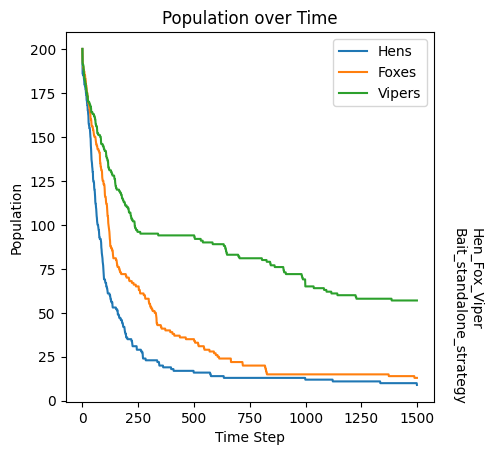

Hens disappeared at: None
Foxes disappeared at: None
Vipers disappeared at: None
Hens dominated from: None to None
Foxes dominated from: None to None
Vipers dominated from: 305 to 1500


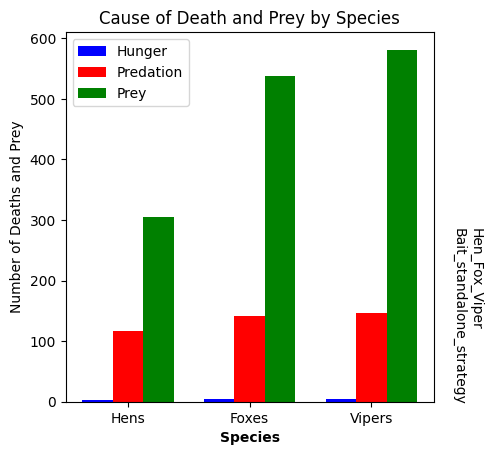

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output

import math
import random

import pygame
from pygame.locals import (K_ESCAPE, KEYDOWN)
import numpy as np

SIMULATION_NAME = 'Hen_Fox_Viper'
SIMULATION_EXPERIMENT = 'Bait_standalone_strategy'


# Define constants for the screen width and height
SCREEN_WIDTH = 500
SCREEN_HEIGHT = 500

class Agent(pygame.sprite.Sprite):
    def __init__(self, size, color, x=None, y=None):
        super().__init__()
        
        self.food_eaten = 0
        self.died_of_starvation = False
        self.vision = 100  # The vision radius of the agent.
        self.cause_of_death = None  # None, 'starvation' or 'hunting'


        # draw agent
        self.surf = pygame.Surface((2*size, 2*size), pygame.SRCALPHA, 32)
        pygame.draw.circle(self.surf, color, (size, size), size)
        self.rect = self.surf.get_rect()

        # default values
        self.vmax = 0.1

        # initial position
        self.x = x if x else random.randint(0, SCREEN_WIDTH)
        self.y = y if y else random.randint(0, SCREEN_HEIGHT)

        # initial velocity
        self.dx = 0
        self.dy = 0

        # inital values
        self.is_alive = True
        self.target = None
        self.age = 0
        self.energy = 1

        # move agent on screen
        self.rect.centerx = int(self.x)
        self.rect.centery = int(self.y)
        
        # Add these lines
        self.food_eaten = 0  # Initialize food eaten as 0
        self.died_of_starvation = False  # Initialize died_of_starvation as False





    def update(self, screen, food=(), prey=(), allies=(), predators=()):
        self.age = self.age + 1

        # we can't move, just update the screen
        if self.vmax == 0:
            screen.blit(self.surf, self.rect)
            return

        # target is dead, don't chase it further
        if self.target and not self.target.is_alive:
            self.target = None

        # eat the target if close enough
        if self.target:
            squared_dist = (self.x - self.target.x) ** 2 + (self.y - self.target.y) ** 2
            if squared_dist < 25:
                self.target.is_alive = False
                self.target.cause_of_death = 'hunting'  # Set cause of death to hunting
                self.energy = self.energy + 1        
                self.food_eaten += 1
    
        # agent doesn't have a target or haven't reevaluated since 11 updates, find a new one
        if not self.target or self.age % 11 == 0:
            min_dist = 9999999
            min_agent = None
            # for food, prey, and allies, only consider those agents which are of different classes
            for a in (food + prey + allies):
                if a is not self and a.is_alive and type(self) != type(a):
                    sq_dist = (self.x - a.x) ** 2 + (self.y - a.y) ** 2
                    if sq_dist < min_dist and sq_dist < self.vision ** 2:  # Consider only those within vision.
                        min_dist = sq_dist
                        min_agent = a
            if not min_agent:
                # Check if a predator is near with a target, if so, target the predator's target instead
                for p in predators:
                    if p.is_alive and p.target and ((self.x - p.x) ** 2 + (self.y - p.y) ** 2) < self.vision ** 2:
                        min_agent = p.target
            if min_dist < self.vision ** 2:  # Set target only if it's within vision.
                self.target = min_agent

        # initalize 'forces' to zero
        fx = 0
        fy = 0

        # move in the direction of the target, if any
        if self.target:
            fx += 0.1*(self.target.x - self.x)
            fy += 0.1*(self.target.y - self.y)

        # update our direction based on the 'force'
        self.dx = self.dx + 0.05*fx
        self.dy = self.dy + 0.05*fy

        # slow down agent if it moves faster than it max velocity
        velocity = math.sqrt(self.dx ** 2 + self.dy ** 2)
        if velocity > self.vmax:
            self.dx = (self.dx / velocity) * (self.vmax)
            self.dy = (self.dy / velocity) * (self.vmax)

        # update position based on delta x/y
        self.x = self.x + self.dx
        self.y = self.y + self.dy

        # ensure it stays within the screen window
        self.x = max(self.x, 0)
        self.x = min(self.x, SCREEN_WIDTH)
        self.y = max(self.y, 0)
        self.y = min(self.y, SCREEN_HEIGHT)

        # update graphics
        self.rect.centerx = int(self.x)
        self.rect.centery = int(self.y)
        if self.is_alive:
            screen.blit(self.surf, self.rect)

        
        # Lose energy over time
        self.energy -= self.energy_decrease_rate
        # Die if energy reaches 0
        if self.energy <= 0:
            self.is_alive = False
            self.died_of_starvation = True
            self.cause_of_death = 'starvation'  # Set cause of death to starvation


class Hen(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (255, 255, 255)  # Use white color for hens
        super().__init__(size, color)
        self.vmax = 0.2  # Max velocity for hens
        self.vision = 70  # Set vision for hens.
        self.energy_decrease_rate = 0.002  # Set energy decrease rate for hens

class Fox(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (255, 0, 0)  # Use red color for foxes
        super().__init__(size, color)
        self.vmax = 0.3  # Max velocity for foxes
        self.vision = 50  # Set vision for foxes.
        self.energy_decrease_rate = 0.003  # Set energy decrease rate for foxes

class Viper(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (0, 0, 255)  # Use blue color for vipers
        super().__init__(size, color)
        self.vmax = 0.25  # Max velocity for vipers
        self.vision = 30  # Set vision for vipers.
        self.energy_decrease_rate = 0.001  # Set energy decrease rate for vipers

class Food(Agent):
    def __init__(self, x=None, y=None):
        size = 2
        color = (0, 128, 0)  # Use green color for food
        super().__init__(size, color)
        self.vmax = 0  # Food doesn't move

def main():
    # Import and initialize the pygame library
    pygame.init()
    clock = pygame.time.Clock()

    # Create the screen object
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    # Set the caption of the window to the simulation name
    pygame.display.set_caption(SIMULATION_NAME)
    
    # create a font object once and render() to create a surface
    font = pygame.font.Font(None, 24)  # Use the default font and set the size to 24
    large_font = pygame.font.Font(None, 32)  # Use the default font and set a larger size for the title and subtitle

    # Create the surfaces for the simulation name and experiment
    sim_name_surf = large_font.render(SIMULATION_NAME, True, (255, 255, 255))
    sim_experiment_surf = large_font.render(SIMULATION_EXPERIMENT, True, (255, 255, 255))

    # Create initial agents before the simulation starts
    hens = [Hen() for i in range(200)]
    foxes = [Fox() for i in range(200)]
    vipers = [Viper() for i in range(200)]
    food_items = [Food() for i in range(200)]

    

    
    # Tracking variables
    hen_population = []
    fox_population = []
    viper_population = []

    dead_hens = []
    dead_foxes = []
    dead_vipers = []

    
    disappearance_times = {'hen': None, 'fox': None, 'viper': None}
    domination_times = {'hen': None, 'fox': None, 'viper': None}
    domination_durations = {'hen': 0, 'fox': 0, 'viper': 0}
    
    # Track deaths separately for each species
    hen_deaths_by_hunger = 0
    fox_deaths_by_hunger = 0
    viper_deaths_by_hunger = 0
    hen_deaths_by_predation = 0
    fox_deaths_by_predation = 0
    viper_deaths_by_predation = 0
    


    frame = 0
    os.makedirs(SIMULATION_EXPERIMENT, exist_ok=True)
    
    living_hens = sum([1 for h in hens if h.is_alive])
    living_foxes = sum([1 for f in foxes if f.is_alive])
    living_vipers = sum([1 for v in vipers if v.is_alive])
    poptot = living_hens + living_foxes + living_vipers

    def generate_food(step):
        if step < 1500:
            amount_of_food = max(100 - step // 15, 10)  # Reduce food amount gradually to 10 by the 1500th step
            for _ in range(amount_of_food):
                food_items.append(Food())
    # Run until the user asks to quit or until 1500 frames are generated
    running = True
    while running and frame < 1500 and (living_hens > 0 or living_foxes > 0 or living_vipers > 0):

        if frame % 100 == 0:
            generate_food(frame)

        # Fill the background
        screen.fill((11, 11, 11))
        # Draw the legend
        legend_hen = font.render('Hens', True, (255, 255, 255))
        legend_fox = font.render('Foxes', True, (255, 0, 0))
        legend_viper = font.render('Vipers', True, (0, 0, 255))
        legend_food = font.render('Food', True, (0, 128, 0))
        pygame.draw.circle(screen, (255, 255, 255), (20, 20), 10)
        screen.blit(legend_hen, (40, 10))
        pygame.draw.circle(screen, (255, 0, 0), (20, 50), 10)
        screen.blit(legend_fox, (40, 40))
        pygame.draw.circle(screen, (0, 0, 255), (20, 80), 10)
        screen.blit(legend_viper, (40, 70))
        pygame.draw.circle(screen, (0, 128, 0), (20, 110), 10)
        screen.blit(legend_food, (40, 100))


        # Update agents
        [f.update(screen) for f in food_items]
        # Update agents
        [h.update(screen, food=food_items, prey=vipers, allies=hens, predators=foxes) for h in hens]
        [f.update(screen, food=food_items, prey=hens, allies=foxes, predators=vipers) for f in foxes]
        [v.update(screen, food=food_items, prey=foxes, allies=vipers, predators=hens) for v in vipers]


        dead_hens.extend([h for h in hens if not h.is_alive])
        dead_foxes.extend([f for f in foxes if not f.is_alive])
        dead_vipers.extend([v for v in vipers if not v.is_alive])
        
        hens = [h for h in hens if h.is_alive]
        foxes = [f for f in foxes if f.is_alive]
        vipers = [v for v in vipers if v.is_alive]



        # Filter out food items that are not alive (have been eaten)
        food_items = [f for f in food_items if f.is_alive]

        # Update disappearance times
        if living_hens == 0 and disappearance_times['hen'] is None:
            disappearance_times['hen'] = frame
        if living_foxes == 0 and disappearance_times['fox'] is None:
            disappearance_times['fox'] = frame
        if living_vipers == 0 and disappearance_times['viper'] is None:
            disappearance_times['viper'] = frame

        # Update domination times and durations
        if max(living_hens/poptot, living_foxes/poptot, living_vipers/poptot) > 0.55:
            if living_hens/poptot > 0.55 and domination_times['hen'] is None:
                domination_times['hen'] = frame
            if living_foxes/poptot > 0.55 and domination_times['fox'] is None:
                domination_times['fox'] = frame
            if living_vipers/poptot > 0.55 and domination_times['viper'] is None:
                domination_times['viper'] = frame
            for species, time in domination_times.items():
                if time is not None:
                    domination_durations[species] += 1

        # Count the current number of each type of agent
        living_hens = sum([1 for h in hens if h.is_alive])
        living_foxes = sum([1 for f in foxes if f.is_alive])
        living_vipers = sum([1 for v in vipers if v.is_alive])
        poptot = living_hens + living_foxes + living_vipers

        hen_population.append(living_hens)
        fox_population.append(living_foxes)
        viper_population.append(living_vipers)

        
        # draw all changes to the screen
        pygame.display.flip()
        clock.tick(10)
        
        frame += 1
        pygame.image.save(screen, f"{SIMULATION_EXPERIMENT}/frame_{frame:03d}.png")


    if living_hens == 0 and living_foxes == 0 and living_vipers == 0:
        print("All agents are dead. Ending simulation.")
    pygame.quit()
    
    # Count the deaths by hunger and predation separately for each species
    hen_deaths_by_hunger += sum([1 for h in hens if h.died_of_starvation]) + sum([1 for h in dead_hens if h.died_of_starvation])
    fox_deaths_by_hunger += sum([1 for f in foxes if f.died_of_starvation]) + sum([1 for f in dead_foxes if f.died_of_starvation])
    viper_deaths_by_hunger += sum([1 for v in vipers if v.died_of_starvation]) + sum([1 for v in dead_vipers if v.died_of_starvation])
    
    hen_deaths_by_predation += sum([1 for h in hens if h.food_eaten]) + sum([1 for h in dead_hens if h.food_eaten])
    fox_deaths_by_predation += sum([1 for f in foxes if f.food_eaten]) + sum([1 for f in dead_foxes if f.food_eaten])
    viper_deaths_by_predation += sum([1 for v in vipers if v.food_eaten]) + sum([1 for v in dead_vipers if v.food_eaten])
    
    hen_kills = sum([h.food_eaten for h in hens]) + sum([h.food_eaten for h in dead_hens])
    fox_kills = sum([f.food_eaten for f in foxes]) + sum([f.food_eaten for f in dead_foxes])
    viper_kills = sum([v.food_eaten for v in vipers]) + sum([v.food_eaten for v in dead_vipers])

    print(f'Hens kills: {hen_kills}')
    print(f'Foxes kills: {fox_kills}')
    print(f'Vipers kills: {viper_kills}')
    



        # Plot the population over time
    fig = plt.figure()
    plt.subplots_adjust(right=0.7)  # Adjust the right boundary of the plot to make room for the text
    plt.plot(hen_population, label='Hens')
    plt.plot(fox_population, label='Foxes')
    plt.plot(viper_population, label='Vipers')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Population over Time')
    # Adding simulation name and experiment as text beside the plot
    plt.annotate(SIMULATION_NAME + "\n" + SIMULATION_EXPERIMENT, 
                 xy=(1.05, 0), xycoords='axes fraction',rotation=-90)
    plt.show()
    
    fig.savefig(f"{SIMULATION_EXPERIMENT}/population_over_time.png",dpi=300)



    print(f'Hens disappeared at: {disappearance_times["hen"]}')
    print(f'Foxes disappeared at: {disappearance_times["fox"]}')
    print(f'Vipers disappeared at: {disappearance_times["viper"]}')
    print(f'Hens dominated from: {domination_times["hen"]} to {domination_times["hen"] + domination_durations["hen"] if domination_times["hen"] is not None else None}')
    print(f'Foxes dominated from: {domination_times["fox"]} to {domination_times["fox"] + domination_durations["fox"] if domination_times["fox"] is not None else None}')
    print(f'Vipers dominated from: {domination_times["viper"]} to {domination_times["viper"] + domination_durations["viper"] if domination_times["viper"] is not None else None}')
    
    with open(f"{SIMULATION_EXPERIMENT}/metrics.txt", "w") as file:
        file.write(f'Hens disappeared at: {disappearance_times["hen"]}\n')
        file.write(f'Foxes disappeared at: {disappearance_times["fox"]}\n')
        file.write(f'Vipers disappeared at: {disappearance_times["viper"]}\n')
        file.write(f'Hens dominated from: {domination_times["hen"]} to {domination_times["hen"] + domination_durations["hen"] if domination_times["hen"] is not None else None}\n')
        file.write(f'Foxes dominated from: {domination_times["fox"]} to {domination_times["fox"] + domination_durations["fox"] if domination_times["fox"] is not None else None}\n')
        file.write(f'Vipers dominated from: {domination_times["viper"]} to {domination_times["viper"] + domination_durations["viper"] if domination_times["viper"] is not None else None}\n')
    
    # Set width of bar
    barWidth = 0.25

    # Set the positions of the bars on the x-axis
    r = np.arange(3)  # For 3 species

        # Create bars
    fig = plt.figure()
    plt.subplots_adjust(right=0.7)  # Adjust the right boundary of the plot to make room for the text
    plt.bar(r - barWidth, [hen_deaths_by_hunger, fox_deaths_by_hunger, viper_deaths_by_hunger], color='b', width=barWidth, label='Hunger')
    plt.bar(r, [hen_deaths_by_predation, fox_deaths_by_predation, viper_deaths_by_predation], color='r', width=barWidth, label='Predation')
    plt.bar(r + barWidth, [hen_kills, fox_kills, viper_kills], color='g', width=barWidth, label='Prey')

    # Adding xticks
    plt.xlabel('Species', fontweight='bold')
    plt.xticks(r, ['Hens', 'Foxes', 'Vipers'])

    plt.ylabel('Number of Deaths and Prey')
    plt.title('Cause of Death and Prey by Species')
    plt.legend()
    # Adding simulation name and experiment as text beside the plot
    plt.annotate(SIMULATION_NAME + "\n" + SIMULATION_EXPERIMENT, 
                 xy=(1.05, 0), xycoords='axes fraction',rotation=-90)

    # Show the plot
    plt.show()
    
    fig.savefig(f"{SIMULATION_EXPERIMENT}/cause_of_death_and_prey.png",dpi=300)

   

if __name__ == "__main__":
    main()

In [3]:
import imageio.v2 as iio
from IPython.display import Video, display
import os
import imageio as iio

SIMULATION_EXPERIMENT = f"/content/{SIMULATION_EXPERIMENT}"
images = []

# Get a list of all image files in the directory with the structure "frame_942.png"
image_files = [filename for filename in os.listdir(SIMULATION_EXPERIMENT) if filename.startswith("frame_") and filename.endswith(".png")]

# Sort the image files based on their numeric part (e.g., frame_942.png, frame_943.png, etc.)
sorted_files = sorted(image_files, key=lambda x: int(x.split("_")[1].split(".")[0]))

# Iterate through the sorted image files
for filename in sorted_files:
    image_path = os.path.join(SIMULATION_EXPERIMENT, filename)
    images.append(iio.imread(image_path))

iio.mimsave('simulation3.mp4', images, fps=30)  # Change the number of fps (frames per second) as needed




import imageio.v2 as iio
from IPython.display import HTML
from base64 import b64encode
# Display the video
mp4 = open('simulation3.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

<ipython-input-3-624a83183a4e>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(iio.imread(image_path))


In [4]:
import os
import zipfile
from google.colab import files

def zipdir(path, ziph, exclude_folder):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        if exclude_folder not in root:
            for file in files:
                ziph.write(os.path.join(root, file), 
                           os.path.relpath(os.path.join(root, file), 
                                           os.path.join(path, '..')))

zipf = zipfile.ZipFile('/content/Output.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('/content/', zipf, 'sample_data')
zipf.close()

# download the file
files.download('/content/Output.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Thank you for the time you have taken to go through this work, we hope you enjoyed it.

it was made by Mattéo Boissier, Hugo Caetano, Louis Couput and Julien Séailles.

You can acces to it on this google colab with the whole environment setup. 

[Here is the google colab](https://colab.research.google.com/drive/1imsACPlwk1uRMk_NHLo8j2c0uoh8WWsV?usp=sharing)